##### Read "01_Multiclass_classification" file: explains about multiclass classification which we will implement in this project.
- In general scikit learn uses 'one vs rest' algo by default. We can see while creating an object, there is a kwarg: `decision_function='ovr'` . 'ovr' is default value which means one vs rest and we can pass 'ovo' also means one vs one.

##### In this pproject, we are given with 4folder which contain images of cats, dogs, horses, humans respectively. So we will build SVM model for this data using multiclass classification from scratch(means no use of any pre-build functions).

### Multiclass Classification Project

Learning Goals
- How to read different size images from a directory?
- How to implement One-vs-one scheme for Multiclass classification?
- How to use SVM for image classifcation?
<img src="2.1classes.png" alt="Classes" style="width: 700px;"/>


## Dataset Preparation
- We have images directory in which we are given 4folders: cat, dog, horse, human. We need to read images from there. We can import images using different platforms like openCV, keras, tensorflow, etc.. 
- As we have studied openCV already, let us try keras now

In [1]:
import numpy as np
import os ## to work with folders and files
from pathlib import Path  ## to work with folders and files 
from keras.preprocessing import image

2022-02-24 17:33:05.096719: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-24 17:33:05.096842: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


- As written in 2nd line of error: **Ignore error like: "libcudart.io" file missing**. We need to install CUDA toolkit for that which is 7gb and it is really helpful bcoz it make use of GPU for graphics pupose rather than using CPU which increases the performance and speed.
- But tensorflow can't give commands to GPU directly, so we need to install a CUDA toolkit which makes use of CUDA software to give commands to GPU directly. **But if you don't have installed CUDA, then tensorflow will use CPU and show error that CUDA file missing.** So you can ignore this error.


- Generally keras or tensorflow make use of GPU when some graphics related work is required as using GPU instead of CPU gives us much better performance and very fast speed for graphics processing. 
- But **my system has integrated graphics which takes shared memory from CPU and do not have a differnt GPU unit** as 'dedicated GPU'. <font color="cyan">**There will be no improvement in my system even if I install CUDA toolkit as I do not have a different GPU unit in my system(integrated graphic card). So using GPU with help of CUDA in my case will use shared memory from CPU which is same as using CPU directly**.</font> 
- So check your specs and download CUDA only if your graphics card is not integrated.
- If someone have a different GPU in their system, then they can use CUDA(which is a software that handles GPU commands like a kernel or shell do) And python has a CUDA toolkit which makes use of CUDA software to perform operations on GPU.
##### Read 03_GPU_IntegratedGraphics.ipynb file to read in detail about GPU, integrated circuit and CUDA toolkit.

- Now let us start our project from here. 
- Open images folder and see: there are images of dogs, cats, horses, humans
- We can use os module or pathlib module to work with files and folders. For now we will use `pathlib module`. It is also easy to work with.

In [2]:
import numpy as np
import os ## to work with folders and files
from pathlib import Path  ## to work with folders and files 
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
p = Path('../../Datasets/Images/images')  ## create object of Path module
print(p, type(p), sep='\n')

../../Datasets/Images/images
<class 'pathlib.PosixPath'>


- So instance of Path() class returns us a string of path. But it is not actually a string, it is a class in pathlib module.
- And this object of Path() class have many objects, one of which is **obj.glob()**

##### Path_obj.glob(<reg>)
- obj.glob() takes a regex as argument and returns all the files matched with that regex inside Path that we passed while creating the object(Here we passed path=../../Datasets/Images)

In [4]:
p = Path("../../Datasets/Images/images")  
p.glob("*") ## pass regex "*" , star means all type of files in regex

<generator object Path.glob at 0x7f928c43b040>

- p.glob() gives us a generator object. Genrator object generates a value using either obj.next() or using this generator object inside a for loop which we studied.
- So this generator object will generate all files present inside the file 

In [5]:
for folder_dir in p.glob("*"):
    print(folder_dir)

../../Datasets/Images/images/dogs
../../Datasets/Images/images/humans
../../Datasets/Images/images/horses
../../Datasets/Images/images/cats


- And we can take last word as label by converting these to strings and then take '/' as seperator and take last value as [-1]

[Note: in windows path is shown using '\' and not '/'. So we need to use '\\' in windows instead of '/' as backslash needs another backslash before it to escape. Otherwise single backslash is used as it's speicial meaning. Using '\\': uses 1st backslash to escape character next to it which is 2nd '\']

In [6]:
for folder_dir in p.glob('*'):
    label = str(folder_dir).split("/")[-1]
    print(label)

dogs
humans
horses
cats


- As ML classifiers do not train on strings, so we need to convert these to integers and create a mapping for them. We will create this mapping intially.

##### keras.preprocessing.image has a method load_img(path, teget_size): 
- it loads image by converting it into desired size. As we have different size of images. So we need to use a common scale woth common size for all images.


In [7]:
p = Path("../../Datasets/Images/images/")  
dirs = p.glob("*") ## * means all type of files present in it.

labels_dict={"cat":0,"dog":1,"horse":2,"human":3} #convert labels to integers by creating mapping .

image_data = []  ## list to store all the images in all subfolders.
labels = []

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1][:-1] # [:-1] to remove 's' from dogs,cats,horses,humans
     
    # iterate over all images inside all directories as glob returns a generator object with passed regex
    for img_path in folder_dir.glob("*.jpg"):
        ## read image using image module from keras
        img = image.load_img(img_path,target_size=(32,32)) #image is module from keras.preprocessing
        img_array = image.img_to_array(img) ## convert image to array(RGB: 3values for each pixel)
        # size of 1 image = (32x32x3) , 3 for RGB channels
        image_data.append(img_array)   ## add image in each iteration inside this list
        labels.append(labels_dict[label])
## as seen earlier: label gives us value as last last value from path and remove last character
# from it('s'). So label can be: cat,dog,... and label_dict[label] will give us 0 for cat, 1 for 
# dog,...
## So here we are appending 0 if image has label=cat, 1 if label=dog,... for corresponding image
# Here we append image in 'image_data' list and corresponding label in 'labels' list

- Let us convert these lists to numpy arrays. 
- In visualization part there was an error: data should be in range '0-1' for floats or '0-255' for integers. Here image module reads pixels as 199.0, 200.0 which are floating values. So we can either use dtype='uint8' or we can divide whole image_data array by 255.0 which will make range of intensity in 0-1 and values will be in float.

- It was giving low accuracy and high error in SVM gradient descent update using 0-255 pixel values as we have (32x32x3 = 3072) features for single image and loss= w.T*x + b will be very high in this case and gradient also. So I tried with floating values from range 0-1 and then results were good.

In [8]:
# Convert this 'image_data' list and 'labels' list into numpy array
image_data = np.array(image_data,dtype='float32')/255   
labels = np.array(labels)

print(image_data.shape,labels.shape)
print( image_data[0,0,:5])

(808, 32, 32, 3) (808,)
[[0.7607843  0.08627451 0.07843138]
 [0.7607843  0.08627451 0.07843138]
 [0.7607843  0.08627451 0.07843138]
 [0.7607843  0.08627451 0.07843138]
 [0.7607843  0.08627451 0.07843138]]


- These are first 5 pixels of 1st image and these have intensity range in 0-1. Or we can use dtype="uint8" in above which will give intensity range 0-255.
- So we got 808 images(with 32x32 pixels and 3 channels) from all 4folders and respective labels. But using above for loop, we got first 202 images from 1st folder and all have same label, similarly images fomr 203-404 have same label and so on.. So we need to shuffle our data

In [9]:
## this is how our images look like after what we did above:(see output)
for folder_dir in p.glob("*"):
    for img_path in folder_dir.glob("*.jpg"):
        print(img_path)

../../Datasets/Images/images/dogs/dog.127.jpg
../../Datasets/Images/images/dogs/dog.119.jpg
../../Datasets/Images/images/dogs/dog.17.jpg
../../Datasets/Images/images/dogs/dog.161.jpg
../../Datasets/Images/images/dogs/dog.82.jpg
../../Datasets/Images/images/dogs/dog.197.jpg
../../Datasets/Images/images/dogs/dog.186.jpg
../../Datasets/Images/images/dogs/dog.178.jpg
../../Datasets/Images/images/dogs/dog.183.jpg
../../Datasets/Images/images/dogs/dog.31.jpg
../../Datasets/Images/images/dogs/dog.60.jpg
../../Datasets/Images/images/dogs/dog.159.jpg
../../Datasets/Images/images/dogs/dog.53.jpg
../../Datasets/Images/images/dogs/dog.70.jpg
../../Datasets/Images/images/dogs/dog.176.jpg
../../Datasets/Images/images/dogs/dog.174.jpg
../../Datasets/Images/images/dogs/dog.145.jpg
../../Datasets/Images/images/dogs/dog.30.jpg
../../Datasets/Images/images/dogs/dog.62.jpg
../../Datasets/Images/images/dogs/dog.173.jpg
../../Datasets/Images/images/dogs/dog.136.jpg
../../Datasets/Images/images/dogs/dog.69.j

### Randomly Shuffle our Data!
- To shuffle data, we do not want to shuffle data but labels should remain same after shuffling. So we zip data and labels in a single unit, shuffle them and then unzip them  

In [10]:
import random

combined = list(zip(image_data,labels))
random.shuffle(combined)

#Unzip
image_data[:],labels[:] = zip(*combined)  ## * is used to unzip any data which has been zipped


### Visualise this data!

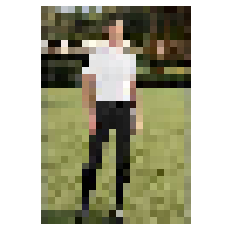

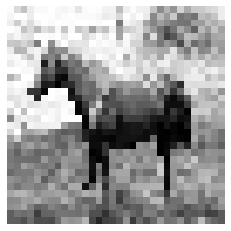

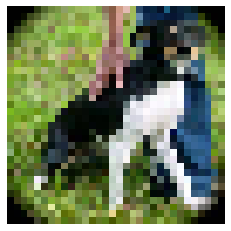

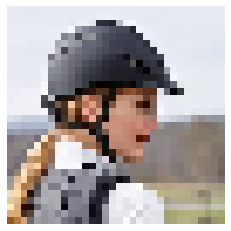

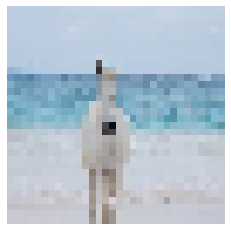

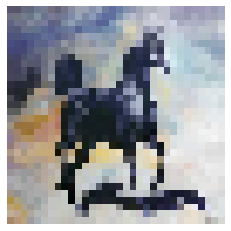

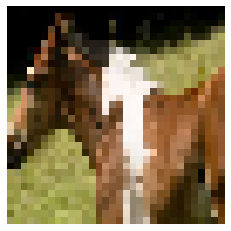

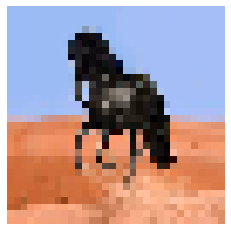

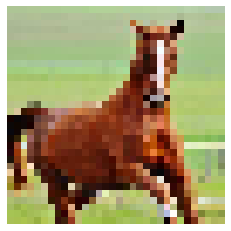

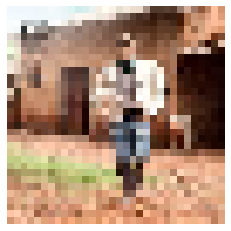

In [11]:
def drawImg(img):
    plt.imshow(img)
    plt.axis("off")  ## turn off axis for images
    plt.show()    
    return 

for i in range(10):
    drawImg(image_data[i])

- These are some images after shuffeling. And these are not much clear bcoz we have read these images in size 32x32.

## SVM Classifier
- Now let us implement our SVM classifier for one-vs-one multiclass classification.
- For 'ovo' , we need to make $^NC_2$ classifiers. We can copy code for SVM classifier for binary classification from our ../1.SVM folder and then add multiclassification using one-v-one by making $^NC_2$ classifiers.

In [12]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.theta = 0  
        
    def hingeLoss(self,theta,X,Y):    
        loss  = 0.0
        loss += .5*np.dot(theta,theta.T)

        loss_2 = 0
        for i in range(X.shape[0]):
            ti = Y[i]*(np.dot(theta,X[i].T))  ## X is now: (m,n+1) and W is: (n+1,)
            loss_2 += max(0,(1-ti))
        loss = loss + self.C*loss_2
        return loss[0][0]  ## loss is a array as [[value]], so return loss[0][0] 
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        m,n = X.shape        
        c = self.C
        
        #Init the model parameters
        theta = np.zeros((1,n))  ## create a vector of size n+1
        
        #Training starts from here...
        losses = []  ## to store losses in each step
        
        ## using Mini-Batch Gradient Descent Algo
        for i in range(maxItr):     #Training Loop for each epoch
            l = self.hingeLoss(theta,X,Y)
            losses.append(l)  ## store loss in each step in this list 
            ids = np.arange(m) ## create list for index values and then shuffle them
            np.random.shuffle(ids) ## shuffle these and choose batches randomly in each iteration

            #Batch Gradient Descent(Paper) with random shuffling
            
            for batch_start in range(0,m,batch_size): ## from 0..m with step_size=batch_size
            ## here 'batch_start' is start idx of every mini batch.
                gradw = 0  ## assume gradient=0 for each mini-batch initially
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    ## if j crosses 'm' then get out of loop
# eg- last batch start from 48:56 ,But m=50, so j need to stop after 50 
                    if j>=m:
                        break
                    else:
                        i = ids[j]  ## i is idx for random values in the batch
                        ti =  Y[i]*(np.dot(theta,X[i].T))
                        ## we have used same variable 'i' for outer for loop and here to save memory
## after ending of each whole epoch: 'i' will be changed to no_of_iterations: 0,1,2...max_iter
## , according to first 'for' loop=>(this is to save memory, or we can use different variable for outer for loop and here)
                        if ti<=1:
                            gradw += c*Y[i]*X[i]
                            
                # Now update W,b after calculating gradient over all examples in mini-batch
                theta = theta - learning_rate*theta + learning_rate*gradw                
                ## update theta each mini batch.
        self.theta = theta
        return theta,losses        

- In SVM, we made a hingeloss which is not required here. And we used mini-batch GD to make theta update and this SVM is applied using Pegoasos formulation and without using any kernel.

- Let us flatten our image from 808x32x32x3 --> 808 x 3072
- Now every image has 3072 features.

In [13]:
M = image_data.shape[0] 
image_data = image_data.reshape(M,-1)  # n0_of_rows = M and calculate columns automatically
print(image_data.shape)
print(labels.shape)

(808, 3072)
(808,)


- But in our SVM, we have used $\theta$ instead of $w$ and $b$. So we need to add column of ones in the beginning:

In [14]:
## add 1s column to make it n+1 features 
ones = np.ones((image_data.shape[0],1)) # rows same as in X_train and one column
new_img_data = np.hstack((ones, image_data)) 
print(new_img_data.shape)

(808, 3073)


### We need to convert data for One-for-One classifcation!
- Read "01_file.pdf", there we dicussed that we need to train using points for only 2classes at a time. For that we need to know what points belong to each class. So we can create a dictionary for all 4 unique classes and create a list for each of these classes which contains all images belonging to that class

In [15]:
CLASSES = len(np.unique(labels))  ## gives us total number of classes
print(CLASSES)

4


In [16]:
def classWiseData(x,y):  ## X is images_data and y is labels here
    data = {}  ## create dictionary to store all 4 unique classes
    
    for i in range(CLASSES):
        data[i] = []  ## for all 4 classes: assign empty list to them initially
## now data={0:[], 1:[], 2:[], 3:[]}. So these keys are also labels for cat,dog,horse,human
## and we will assign X_points(images) to belonging class
        
    for i in range(x.shape[0]):  ## for all points
        data[y[i]].append(x[i])  ## y[i] = 0 for cat, 1-dog,.. So add image to corresponding label
## now data={0:[........], 1:[.......], 2:[........], 3:[........]}
## All of these 4 classes will now have some points assigned to them 
    
    for k in data.keys():
        data[k] = np.array(data[k]) ## convert each list to a numpy array
        
    return data

In [17]:
## don't forget to use updated data with n+1 features, else there will be lots of errors later on
data = classWiseData(new_img_data,labels)
print(type(data), type(data[0]))
print(data[0].shape, data[1].shape, data[2].shape, data[3].shape)

<class 'dict'> <class 'numpy.ndarray'>
(202, 3073) (202, 3073) (202, 3073) (202, 3073)


- 'data' is a dictionay where keys are class_labels and values are numpy_array containing all the images belonging to corresponding key(label).
- As 'data' is dictionary, So len(dict) = 4 as there are 4 keys(unique labels) in it and every label has 202 images in them as shown by data[0].shape,...

<img src="2.2img.jpeg" alt="image" align="left" style="width: 450px;">

In [18]:
def getDataPairForSVM(d1,d2):
    """Combines Data of two classes into a signle matrix"""
    
    l1,l2 = d1.shape[0],d2.shape[0]
    
    samples = l1+l2  ## total number of examples
    features = d1.shape[1]  ## number of features( here it will always be 3072)
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1  ## assign d1 from 0:l1
    data_pair[l1:,:] = d2  ## assign d2 from l1:l1+l2 which is end also
    
    data_labels[:l1] = -1  ## give labels -1 for 1st class
    data_labels[l1:] = +1  ## give labels +1 for 1st class
    
    return data_pair,data_labels

## Training  $^NC_2$ SVM's Part!

- Before training, as we are using $\theta$ instead of using $w$ and $b$ . So we need to add a column of ones to make images with 3073 features and then pass that to training 

In [19]:
## add 1s column to make it n+1 features 
ones = np.ones((image_data.shape[0],1)) # rows same as in X_train and one column
new_img_data = np.hstack((ones, image_data)) 
print(new_img_data.shape)

(808, 3073)


- **Earlier it was giving very high deviations in error and error started from 400 and went upto $10^5$. This was bcoz learning rate was high. So I decreased learning_rate from 0.001--> 0.00001.** Now results are better and error is decreasing.
- And error was not reached to minimum, it was still decreasing after 500iterations. So I passed 1000 iterations(we can do more, but that will take more time.)

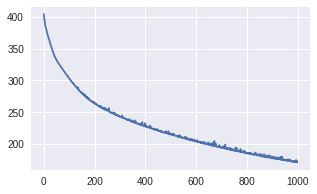

In [20]:
plt.style.use('seaborn')
plt.figure(figsize=(5,3))
mySVM  = SVM()
xp, yp  = getDataPairForSVM(data[0],data[1]) #data is dict. that gives us all points in a class.
theta, loss  = mySVM.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
# print(loss)
plt.plot(loss)

- To get a pairwise data: eg- if we have classes: 0,1,2,3 then pairs will be like 0 will be paired with=> 1,2,3 and then 1 with=> 2,3 and 2 with=> 3
- So we make pairs using 2 for loops  to pair and j always starts from i+1 as seen in above example. i=0--> j=1,2,3 , i=1--> j=2,3 , i=2--> j=3

In [21]:
def trainSVMs(x,y):
    
    svm_classifiers = {}  ## to store all NC2 classifiers
    for i in range(CLASSES):  ## CLASSES=N=4 here
        svm_classifiers[i] = {}  ## create a sub_dictionary for each classes where key="class_id"
        ## we will add all the pairs in sub dictionary. At last svm_classifier will be as:
# {0 : {1 : 'theta(0-1)' , 2:.. , 3:..}, 1: {2:.., 3:..}, 2:{3:..}, 3:{}} see below cell O/P
        for j in range(i+1,CLASSES):  ## start from i+1
            xpair,ypair = getDataPairForSVM(data[i],data[j]) # get data of 2pairs only to train for each classifier
            theta,loss = mySVM.fit(xpair,ypair,learning_rate=0.00001,maxItr=1000)
            svm_classifiers[i][j] = theta  ## add theta for (i-j) pair
            
            plt.figure(figsize=(5,3))
            plt.plot(loss)
            plt.show()
            
    
    return svm_classifiers

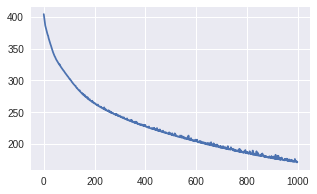

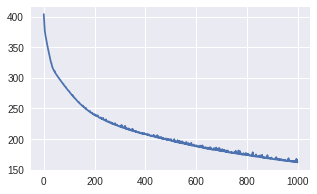

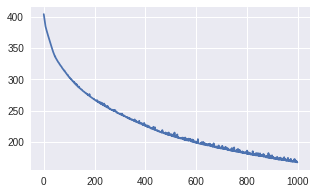

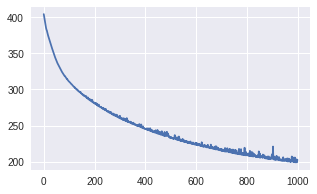

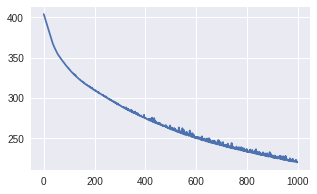

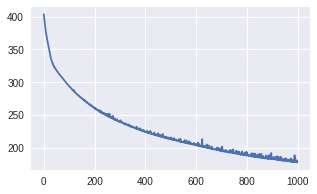

In [22]:
## don't forget to pass updated images data with 3073 features, else it'll give some error 
svm_classifiers = trainSVMs(new_img_data,labels)

In [23]:
print(svm_classifiers)
print("theta for cats_dogs: ", svm_classifiers[0][1].shape)
print("theta for dogs_humans: ", svm_classifiers[1][3].shape)

{0: {1: array([[-0.08419907, -0.00376962,  0.02733637, ...,  0.01797096,
         0.02556984,  0.00454161]]), 2: array([[-0.15089789, -0.02437183, -0.00390203, ...,  0.04222986,
         0.03511033, -0.00232154]]), 3: array([[-0.04941661,  0.02086216,  0.0341381 , ...,  0.05191514,
         0.05730103,  0.03465083]])}, 1: {2: array([[-0.08486835, -0.02323106, -0.02493308, ...,  0.01421666,
         0.00747898, -0.01738211]]), 3: array([[0.01960758, 0.02253681, 0.00956282, ..., 0.04030983, 0.04300179,
        0.04241934]])}, 2: {3: array([[0.09175992, 0.03904272, 0.02700207, ..., 0.02364212, 0.03462464,
        0.04955465]])}, 3: {}}
theta for cats_dogs:  (1, 3073)
theta for dogs_humans:  (1, 3073)


- We have 4dictionaries in svm_classifiers dict. And 0 is mapped with --> {1,2,3} .. 1 with --> {2,3} and 2--> {3} and 3--> {} empty. as cat=0, dog=1, horse=2, human=3. So (0,1) has $\theta = [\theta_0, \theta_1 ... \theta_{3073}]$ for seperating cat and dogs and is has been trained only on cats and dogs data. Similar for all others

## Prediction
- Now we have trained $^NC_2$ classifiers and know $\theta$ parameters which are parameters of hyperplane seperating all (i-j) pairs. To make predictions, we need to test our testing_point over all classifiers, and then do majority voting. 

In [24]:
## this function predicts for a binary classifier: if distance>0: then +ve class else -ve class
def binaryPredict(x,theta):
    z  = np.dot(x,theta.T)
    if z>=0:
        return 1
    else:
        return -1  ## in case of logistic regression, it would be 0

- Here in below cell: we have create a vector with N(CLASSES) size and initialized all to zero. Then we will train on all $^NC_2$ classifiers and increase the count of class which is the predicted O/P in each iteration. In end, the class which has maximum count will be predicted O/P. (As we discussed in 01_file.pdf)

In [25]:
def predict(x):    
    count = np.zeros((CLASSES,))  
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            theta = svm_classifiers[i][j]  ## get theta for (i-j) classiifier
            
            #Take a majority prediction 
            z = binaryPredict(x,theta)  
            if(z==1):  ## increase count of class which predicts output in (i,j)th iteration
                count[j] += 1
            else:
                count[i] += 1
    
    final_prediction = np.argmax(count)  # predicted output is class which has majority count
    #print(count)
    return final_prediction

- We can add 1 to make every image with 3073 features inside our predictions. But instead of adding 1 for each image inside predictions for loop, we can first conevrt whole testing array to array of ones and then do testing.

In [26]:
print(predict(new_img_data[0]))
print(labels[0])

3
3


In [27]:
def accuracy(x,y):
    
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count += 1
            
    return count/x.shape[0]

In [28]:
accuracy(new_img_data,labels)

0.594059405940594

# SVM using SK-learn 



In [29]:
from sklearn import svm

In [30]:
svm_classifier = svm.SVC(kernel='linear',C=1.0)

In [31]:
svm_classifier.fit(image_data,labels)
svm_classifier.score(image_data,labels)

0.6472772277227723

- We can see that our accuracy is 60% and sklearn gives us 65% accuracy. So we have build quiet good model.
- And we can increase accuracy by increasing size of image and increasing number of iterations. But that will take more time also. 

#### See assignment_10 also